# Logistic Regression 

In [68]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import log_loss
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [44]:
#Loading dataset
df = pd.read_csv("ufc.csv")


df.columns = df.columns.str.strip()  #Removing white space
df.fillna(0, inplace=True)       #Replacing null values with 0
df.head()       #Display first 5 rows

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Derrick Lewis,Ciryl Gane,250,-320,250.000000,31.250000,07/08/2021,"Houston, Texas, USA",USA,Blue,...,Punches,3.0,04:11,851.0,1400.0,215.0,2200.0,600.0,330.0,120.0
1,Jose Aldo,Pedro Munhoz,-105,-115,95.238095,86.956522,07/08/2021,"Houston, Texas, USA",USA,Red,...,0,3.0,05:00,900.0,150.0,225.0,1600.0,900.0,450.0,450.0
2,Michael Chiesa,Vicente Luque,-115,-105,86.956522,95.238095,07/08/2021,"Houston, Texas, USA",USA,Blue,...,D'Arce Choke,1.0,03:25,205.0,225.0,300.0,350.0,650.0,900.0,300.0
3,Tecia Torres,Angela Hill,-160,140,62.500000,140.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,0,3.0,05:00,900.0,-105.0,180.0,1000.0,2000.0,1100.0,750.0
4,Song Yadong,Casey Kenney,105,-125,105.000000,80.000000,07/08/2021,"Houston, Texas, USA",USA,Red,...,0,3.0,05:00,900.0,215.0,165.0,1100.0,800.0,350.0,700.0


In [45]:
#Number of times Red fighter or Blue fighter won
n_wins = df['Winner'].value_counts()
n_wins

Red     280
Blue    218
Name: Winner, dtype: int64

In [46]:
#Number of wins
n_blue = 218
n_red = 280

In [47]:
plt.style.use('ggplot')

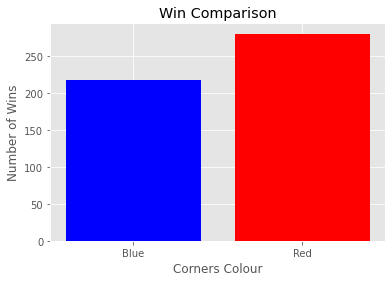

In [48]:
#Plotting barchart
x = ['Blue', 'Red']
wins = [218, 280]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, wins, color=['blue','red'])
plt.xlabel("Corners Colour")
plt.ylabel("Number of Wins")
plt.title("Win Comparison")

plt.xticks(x_pos, x)

plt.show()

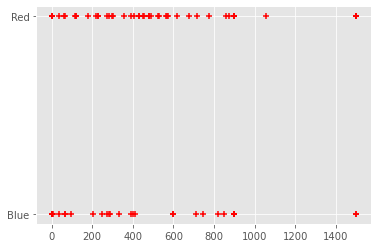

In [49]:
#Scatter graph
plt.scatter(df.total_fight_time_secs, df.Winner ,marker='+',color='red') 

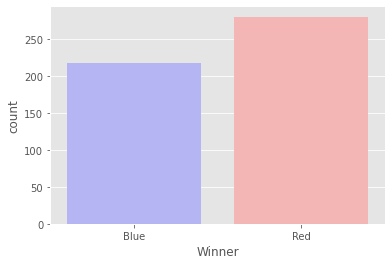

In [50]:
sns.countplot(x= 'Winner', data = df, palette = 'bwr')

In [51]:
features = ['R_odds', 'B_odds']

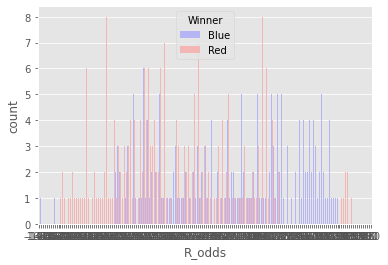

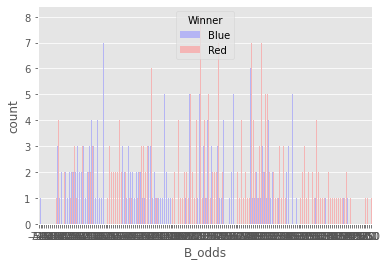

In [52]:
#Plot graph to show any correlation between the odds and the winner
for f in features:
    sns.countplot(x= f, data = df, palette = 'bwr', hue = 'Winner')
    plt.show()

In [53]:
#dataframe datatypes not numbers
df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64']

R_fighter            object
B_fighter            object
date                 object
location             object
country              object
Winner               object
title_bout             bool
weight_class         object
gender               object
B_Stance             object
R_Stance             object
better_rank          object
finish               object
finish_details       object
finish_round_time    object
dtype: object

In [54]:
#Categorical features
cat_features = ['R_fighter','B_fighter', 'date', 'location','country', 'title_bout', 'weight_class' ,
                'gender', 'B_Stance', 'R_Stance', 'better_rank', 'finish_round_time' ,'finish_details', 'finish']

In [55]:
#One-hot encoding
new_df = pd.get_dummies(df, columns = cat_features)
print(df.shape)
print(new_df.shape)

new_df['Winner'][new_df['Winner'] == 'Blue'] = 1
new_df['Winner'][new_df['Winner'] == 'Red'] = 0

new_df

(498, 119)
(498, 1021)


<ipython-input-55-925b51707fed>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Blue'] = 1
<ipython-input-55-925b51707fed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Winner'][new_df['Winner'] == 'Red'] = 0


,R_odds,B_odds,R_ev,B_ev,Winner,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,...,finish_details_Punch,finish_details_Punches,finish_details_Rear Naked Choke,finish_0,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_S-DEC,finish_SUB,finish_U-DEC
0,250,-320,250.000000,31.250000,1,5,0,6,0,5.37,...,0,1,0,0,0,1,0,0,0,0
1,-105,-115,95.238095,86.956522,0,3,0,1,0,5.55,...,0,0,0,0,0,0,0,0,0,1
2,-115,-105,86.956522,95.238095,1,3,0,3,0,5.65,...,0,0,0,0,0,0,0,0,1,0
3,-160,140,62.500000,140.000000,0,3,0,1,0,5.71,...,0,0,0,0,0,0,0,0,0,1
4,105,-125,105.000000,80.000000,0,3,1,0,0,4.85,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,188,-240,188.000000,41.666667,1,3,0,4,0,4.01,...,0,0,0,0,0,0,0,0,0,1
494,100,-124,100.000000,80.645161,1,3,0,1,0,3.29,...,0,0,0,0,0,0,0,0,0,1
495,130,-162,130.000000,61.728395,1,3,1,0,0,1.79,...,0,0,0,0,0,0,0,0,0,1
496,240,-315,240.000000,31.746032,1,3,0,1,0,1.13,...,0,0,0,0,0,0,0,0,1,0


In [56]:
#Splitting data into X and y to be used in the Decision Tree below
X = new_df.drop('Winner', axis=1).values
y = new_df['Winner']


y = y.astype(int)



print(X.shape)
print(y.shape)

(498, 1020)
(498,)


In [57]:
#DecisionTree to analyse the features and show which are best to use
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion ='entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [58]:
#Running Feature Importance

#Creating new dataframe to organise the values
fi_col = []
fi = []

for i,column in enumerate(new_df.drop('Winner', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for R_odds is : 0.08679974388485366
The feature importance for B_odds is : 0.0
The feature importance for R_ev is : 0.0
The feature importance for B_ev is : 0.04168646709034943
The feature importance for no_of_rounds is : 0.0
The feature importance for B_current_lose_streak is : 0.0
The feature importance for B_current_win_streak is : 0.009925633253983487
The feature importance for B_draw is : 0.0
The feature importance for B_avg_SIG_STR_landed is : 0.025644469356890385
The feature importance for B_avg_SIG_STR_pct is : 0.03307484263696598
The feature importance for B_avg_SUB_ATT is : 0.0
The feature importance for B_avg_TD_landed is : 0.02065024943423774
The feature importance for B_avg_TD_pct is : 0.0
The feature importance for B_longest_win_streak is : 0.0
The feature importance for B_losses is : 0.0
The feature importance for B_total_rounds_fought is : 0.01441167125145936
The feature importance for B_total_title_bouts is : 0.0
The feature importance for B_win_

The feature importance for B_fighter_Greg Hardy is : 0.0
The feature importance for B_fighter_Gregor Gillespie is : 0.0
The feature importance for B_fighter_Gregory Rodrigues is : 0.0
The feature importance for B_fighter_Guram Kutateladze is : 0.0
The feature importance for B_fighter_Gustavo Lopez is : 0.0
The feature importance for B_fighter_Hakeem Dawodu is : 0.0
The feature importance for B_fighter_Hannah Cifers is : 0.0
The feature importance for B_fighter_Hannah Goldy is : 0.0
The feature importance for B_fighter_Harry Hunsucker is : 0.0
The feature importance for B_fighter_Heili Alateng is : 0.0
The feature importance for B_fighter_Hunter Azure is : 0.0
The feature importance for B_fighter_Ian Heinisch is : 0.0
The feature importance for B_fighter_Ignacio Bahamondes is : 0.0
The feature importance for B_fighter_Ike Villanueva is : 0.0
The feature importance for B_fighter_Ilia Topuria is : 0.0
The feature importance for B_fighter_Ilir Latifi is : 0.0
The feature importance for B_f

In [59]:
#Creating the fi_df dataframe
fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature', 'Feature Importance'])
fi_df


#Ordering the data
fi_sorted = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

#Viewing which columns have importance
fi_sorted.head(35)

#Creating Columns to keep
columns_to_keep = fi_df['Feature'][0:33]



In [60]:
#Printing the data shapes

print(new_df.shape)
print(new_df[columns_to_keep].shape)

(498, 1021)
(498, 33)


In [61]:
#Splitting the data in X & y only using important features

X = new_df[columns_to_keep].values  #.values to convert the df to a numpy array
X

y = new_df['Winner']
y = y.astype(int)      #converting y from object to int
y

print(X.shape)
print(y.shape)

(498, 33)
(498,)


In [62]:
#Splitting the data

#First Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

#Hold out data split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=15)

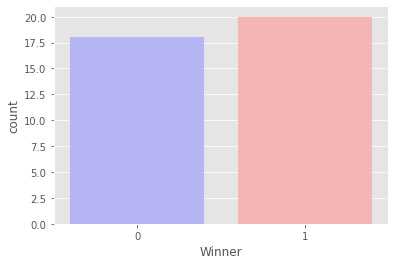

In [63]:
#Checking the distribution of the Ys to make sure the data is balanced

ax = sns.countplot(x= y_valid, palette = "bwr")

In [64]:
#Running the logistic regression model

log_reg = LogisticRegression(random_state=10, solver = 'lbfgs', max_iter=100)

log_reg.fit(X_train, y_train)

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [67]:
#Logistic Regression Methods

#Predict class for samples in X
log_reg.predict(X_train)

y_pred = log_reg.predict(X_train)

#Predict Probability (Left is probability it's 0 i.e Red wins and right is probability it's 1 i.e Blue wins)
pred_proba = log_reg.predict_proba(X_train)

#Coefficient of the features in the decision function
log_reg.coef_

print(pred_proba) #Showing the predicted probability for either Red or Blue win



[[0.27453928 0.72546072]
 [0.5530019  0.4469981 ]
 [0.04852642 0.95147358]
 [0.45488151 0.54511849]
 [0.60717888 0.39282112]
 [0.5123321  0.4876679 ]
 [0.66117255 0.33882745]
 [0.71397397 0.28602603]
 [0.5393103  0.4606897 ]
 [0.73114794 0.26885206]
 [0.49756326 0.50243674]
 [0.62374755 0.37625245]
 [0.70177761 0.29822239]
 [0.34457442 0.65542558]
 [0.07770157 0.92229843]
 [0.76231716 0.23768284]
 [0.67644187 0.32355813]
 [0.38569834 0.61430166]
 [0.70909334 0.29090666]
 [0.62323252 0.37676748]
 [0.56721857 0.43278143]
 [0.64807467 0.35192533]
 [0.54695105 0.45304895]
 [0.70764312 0.29235688]
 [0.27580166 0.72419834]
 [0.47354969 0.52645031]
 [0.58045024 0.41954976]
 [0.79259368 0.20740632]
 [0.58431764 0.41568236]
 [0.61388545 0.38611455]
 [0.79332913 0.20667087]
 [0.58619754 0.41380246]
 [0.81797967 0.18202033]
 [0.37809586 0.62190414]
 [0.53003221 0.46996779]
 [0.64158686 0.35841314]
 [0.57963341 0.42036659]
 [0.62958291 0.37041709]
 [0.71679108 0.28320892]
 [0.13771857 0.86228143]


In [35]:
#Evaluating the model

#Accuracy on the training data
print("The Training accuracy is: ", log_reg.score(X_train, y_train))

#Accuracy on test data
print("The Test accuracy is: ", log_reg.score(X_test, y_test))

#Classification Report
print(classification_report(y_train, y_pred))

The Training accuracy is:  0.6537313432835821
The Test accuracy is:  0.696
              precision    recall  f1-score   support

           0       0.65      0.82      0.72       186
           1       0.66      0.45      0.54       149

    accuracy                           0.65       335
   macro avg       0.66      0.63      0.63       335
weighted avg       0.66      0.65      0.64       335



In [36]:
#Confusion Matrix Function
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':30})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

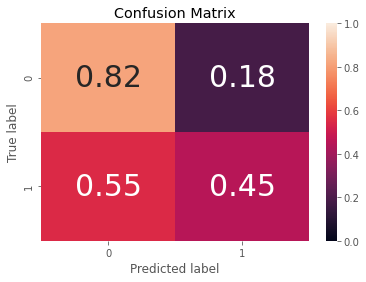

In [37]:
#Visualising Confusion Matrix

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title = "Confusion Matrix")

In [57]:
#Calculating False Positive(FP), False Negative(FN), True Positive(TP) and True Negative(TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum()- (FP + FN + TP)

#Sensitivity, hit rate, recall or True positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is: ", TPR)

#Precision or Positive predictive value
PPV = TP / (TP+ FP)
print("The Precision is: ", PPV)

#False positive rate
FPR = FP / (FP + TN)
print("The False Positive rate is: ", FPR)

#False Negative rate
FNR = FN / (FN + TP)
print("The False Negative rate is: ", FNR)

#Averages:
print("")
print("The average TPR is: ", TPR.sum()/2)
print("The average Precision rate is: " , PPV.sum()/2)
print("The False Positive rate is: " , FPR.sum()/2)
print("The False Negative rate is: " , FNR.sum()/2)

The True Positive Rate is:  [0.8172043  0.44966443]
The Precision is:  [0.64957265 0.66336634]
The False Positive rate is:  [0.55033557 0.1827957 ]
The False Negative rate is:  [0.1827957  0.55033557]

The average TPR is:  0.6334343653027351
The average Precision rate is:  0.6564694931031565
The False Positive rate is:  0.3665656346972649
The False Negative rate is:  0.3665656346972649


In [63]:
#Running log loss on training
print("The log loss on training is: ", log_loss(y_train, pred_proba))

#Running log loss on testing
pred_proba_t = log_reg.predict_proba(X_test)
print("The log loss on testing is: ", log_loss(y_test, pred_proba_t))

The log loss on training is:  0.6287798410796449
The log loss on testing is:  0.6383580190356714


In [64]:
np.geomspace(1e-5, 1e5, num=20) # Range of values used for C

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

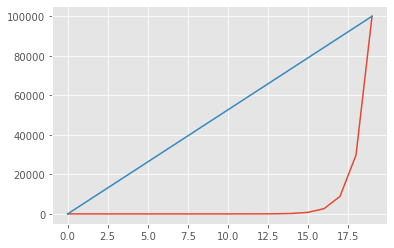

In [71]:
#Hyper-Parameter Tuning

# Creating a range for C values
np.geomspace(1e-5, 1e5, num=20)

# ploting it
plt.plot(np.geomspace(1e-5, 1e5, num=20)) #  uniformly distributed in log space (Red line)
plt.plot(np.linspace(1e-5, 1e5, num=20)) # uniformly distributed in linear space, instead of log space (Blue line)
# plt.plot(np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)) # same as geomspace


In [74]:
#Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []     #Classification Accuracy
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The log loss of C parameter {} is {}:".format(c, log_loss2))
    print("")

The CA of C parameter 1e-05 is 0.64:
The log loss of C parameter 1e-05 is 0.6261038853068687:

The CA of C parameter 3.359818286283781e-05 is 0.664:
The log loss of C parameter 3.359818286283781e-05 is 0.6316306016346022:

The CA of C parameter 0.00011288378916846884 is 0.672:
The log loss of C parameter 0.00011288378916846884 is 0.6359988199503298:

The CA of C parameter 0.000379269019073225 is 0.664:
The log loss of C parameter 0.000379269019073225 is 0.6382126518012493:



C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 0.0012742749857031334 is 0.656:
The log loss of C parameter 0.0012742749857031334 is 0.6378696215349937:

The CA of C parameter 0.004281332398719391 is 0.672:
The log loss of C parameter 0.004281332398719391 is 0.6357867335466162:

The CA of C parameter 0.01438449888287663 is 0.68:
The log loss of C parameter 0.01438449888287663 is 0.6365335193965899:



C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 0.04832930238571752 is 0.704:
The log loss of C parameter 0.04832930238571752 is 0.6375133784326065:

The CA of C parameter 0.1623776739188721 is 0.672:
The log loss of C parameter 0.1623776739188721 is 0.6431456099619284:

The CA of C parameter 0.5455594781168515 is 0.688:
The log loss of C parameter 0.5455594781168515 is 0.6384987626196723:

The CA of C parameter 1.8329807108324339 is 0.672:
The log loss of C parameter 1.8329807108324339 is 0.6449961978853588:

The CA of C parameter 6.1584821106602545 is 0.68:
The log loss of C parameter 6.1584821106602545 is 0.6476022542653295:

The CA of C parameter 20.6913808111479 is 0.672:
The log loss of C parameter 20.6913808111479 is 0.6451853535108647:



C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 69.51927961775606 is 0.68:
The log loss of C parameter 69.51927961775606 is 0.6427320151670548:

The CA of C parameter 233.57214690901213 is 0.688:
The log loss of C parameter 233.57214690901213 is 0.6418439656630067:

The CA of C parameter 784.7599703514607 is 0.68:
The log loss of C parameter 784.7599703514607 is 0.6436793547593247:

The CA of C parameter 2636.6508987303555 is 0.672:
The log loss of C parameter 2636.6508987303555 is 0.6460139878573989:



C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 8858.667904100832 is 0.672:
The log loss of C parameter 8858.667904100832 is 0.6443187593958558:

The CA of C parameter 29763.51441631313 is 0.672:
The log loss of C parameter 29763.51441631313 is 0.6449821333118196:

The CA of C parameter 100000.0 is 0.68:
The log loss of C parameter 100000.0 is 0.6435110339533644:



C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [84]:
#Putting the outcomes into a table

#Reshaping
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)

#Zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ['C_List', 'CA2', 'Logarithmic_Loss2'])

#print
df_outcomes

#Ordering the data
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()
df_outcomes.sort_values("CA2", ascending = False).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,7,0.048329,0.704,0.637513
1,14,233.572147,0.688,0.641844
2,9,0.545559,0.688,0.638499
3,19,100000.000000,0.680,0.643511
4,15,784.759970,0.680,0.643679
5,6,0.014384,0.680,0.636534
6,13,69.519280,0.680,0.642732
7,11,6.158482,0.680,0.647602
8,12,20.691381,0.672,0.645185
9,18,29763.514416,0.672,0.644982


In [91]:
#Using LogisticRegressionCV to find the optimal parameters using Kfold cross validation
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# List of C
C_list = np.logspace(np.log10(1e-5) , np.log10(1e5) , num=20)

# Logistic Reg CV
log_reg3 = LogisticRegressionCV(cv=kf, random_state=15, Cs = C_List)
log_reg3.fit(X_train, y_train)
print("The CA is:", log_reg3.score(X_test, y_test))
pred_proba_t = log_reg3.predict_proba(X_test)
log_loss3 = log_loss(y_test, pred_proba_t)
print("The logistic loss is:", log_loss3)

print("The optimal C parameter is:", log_reg3.C_)

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA is: 0.656
The logistic loss is: 0.6386752774783435
The optimal C parameter is: [0.00037927]


C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The CA of C parameter 1e-05 is 0.64:
The log loss of C parameter 1e-05 is 0.6261038853068687:



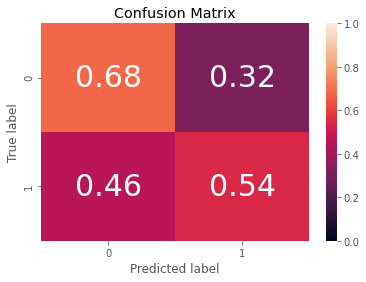

The CA of C parameter 3.359818286283781e-05 is 0.664:
The log loss of C parameter 3.359818286283781e-05 is 0.6316306016346022:



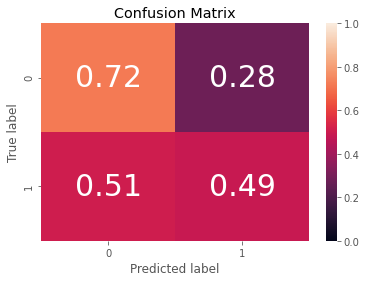

The CA of C parameter 0.00011288378916846884 is 0.672:
The log loss of C parameter 0.00011288378916846884 is 0.6359988199503298:



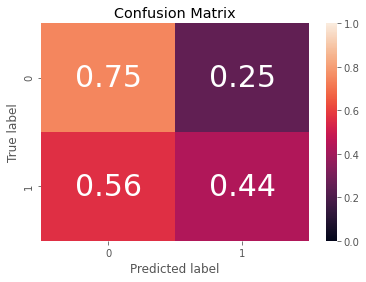

The CA of C parameter 0.000379269019073225 is 0.664:
The log loss of C parameter 0.000379269019073225 is 0.6382126518012493:



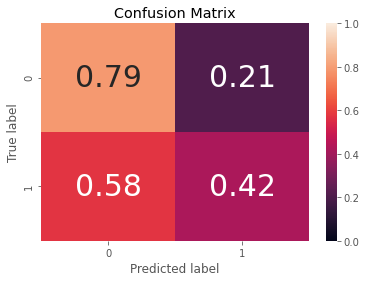

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.0012742749857031334 is 0.656:
The log loss of C parameter 0.0012742749857031334 is 0.6378696215349937:



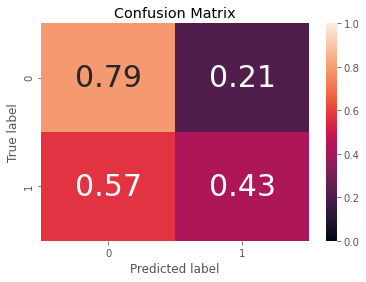

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.004281332398719391 is 0.672:
The log loss of C parameter 0.004281332398719391 is 0.6357867335466162:



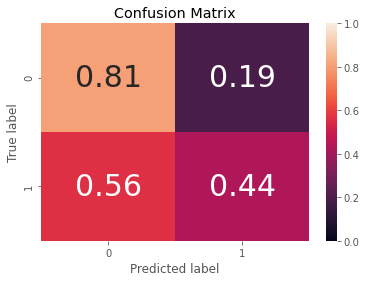

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.01438449888287663 is 0.68:
The log loss of C parameter 0.01438449888287663 is 0.6365335193965899:



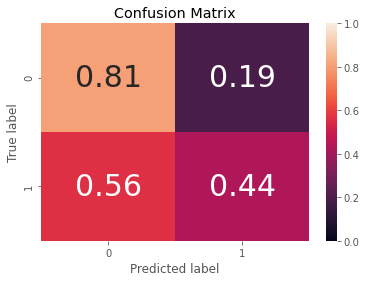

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.04832930238571752 is 0.704:
The log loss of C parameter 0.04832930238571752 is 0.6375133784326065:



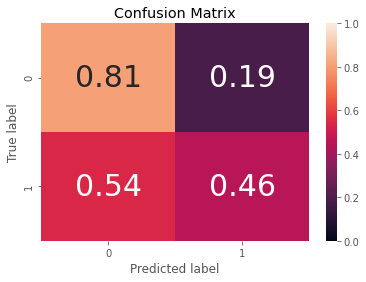

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.1623776739188721 is 0.672:
The log loss of C parameter 0.1623776739188721 is 0.6431456099619284:



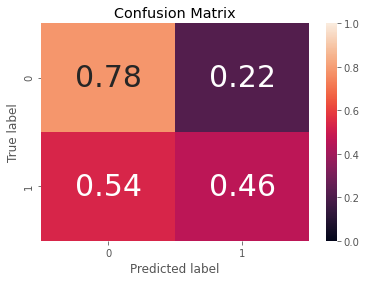

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 0.5455594781168515 is 0.688:
The log loss of C parameter 0.5455594781168515 is 0.6384987626196723:



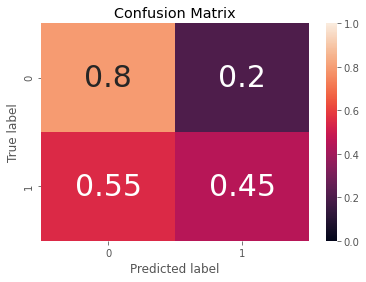

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 1.8329807108324339 is 0.672:
The log loss of C parameter 1.8329807108324339 is 0.6449961978853588:



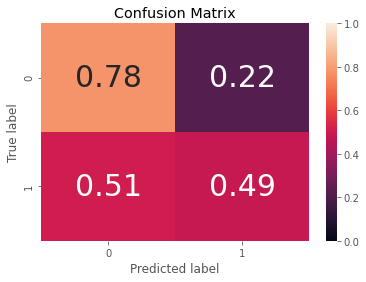

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 6.1584821106602545 is 0.68:
The log loss of C parameter 6.1584821106602545 is 0.6476022542653295:



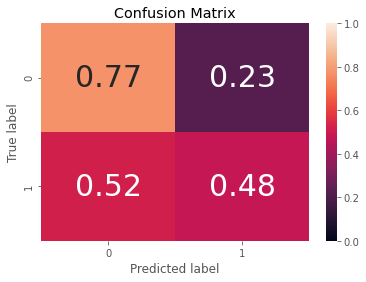

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 20.6913808111479 is 0.672:
The log loss of C parameter 20.6913808111479 is 0.6451853535108647:



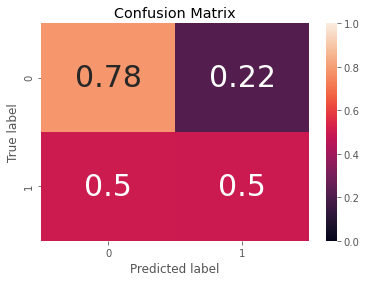

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 69.51927961775606 is 0.68:
The log loss of C parameter 69.51927961775606 is 0.6427320151670548:



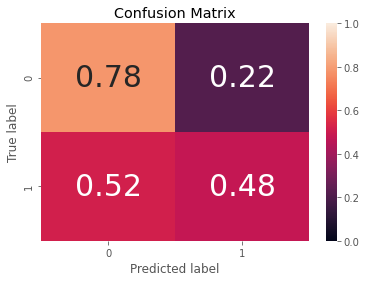

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 233.57214690901213 is 0.688:
The log loss of C parameter 233.57214690901213 is 0.6418439656630067:



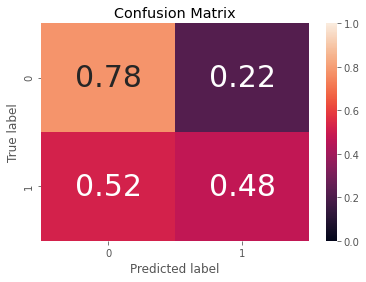

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 784.7599703514607 is 0.68:
The log loss of C parameter 784.7599703514607 is 0.6436793547593247:



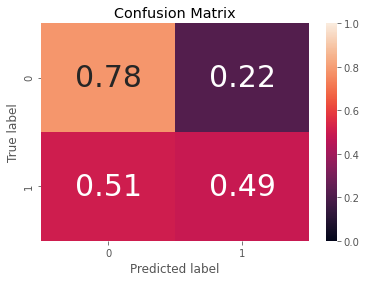

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 2636.6508987303555 is 0.672:
The log loss of C parameter 2636.6508987303555 is 0.6460139878573989:



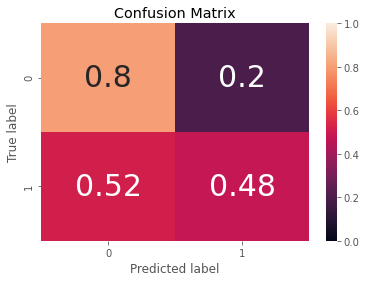

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 8858.667904100832 is 0.672:
The log loss of C parameter 8858.667904100832 is 0.6443187593958558:



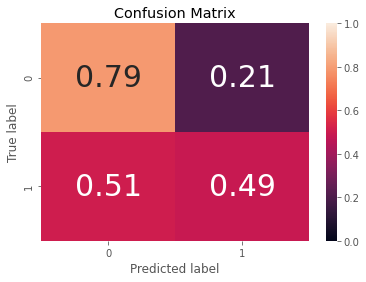

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 29763.51441631313 is 0.672:
The log loss of C parameter 29763.51441631313 is 0.6449821333118196:



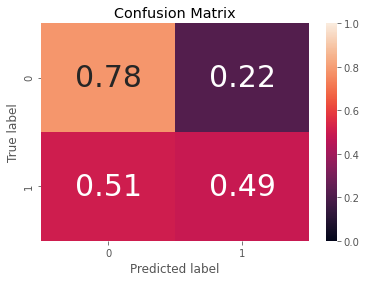

C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The CA of C parameter 100000.0 is 0.68:
The log loss of C parameter 100000.0 is 0.6435110339533644:



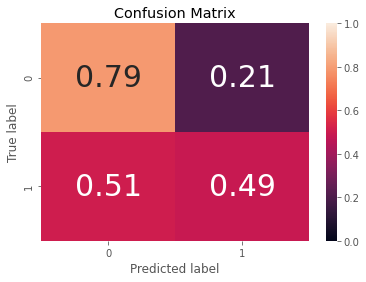

In [92]:
#Confusion Matrix per C parameter

#Looping over the parameters

C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []     #Classification Accuracy
Logarithmic_Loss = []

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    Logarithmic_Loss.append(log_loss2)
    print("The log loss of C parameter {} is {}:".format(c, log_loss2))
    print("")
    
    #Visualising Confusion Matrix
    y_pred = log_reg2.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title = "Confusion Matrix")
    plt.show()

In [96]:
#Training Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = log_reg2.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print("Testing Accuracy: ", score)
print("Log Loss:", log_loss2)

Testing Accuracy:  0.68
Log Loss: 13.539200346804988


In [97]:
#Final Model with selected Parameters

log_reg4 = LogisticRegression(random_state=10, solver = 'lbfgs', C=0.048329)
log_reg4.fit(X_train, y_train)
score = log_reg4.score(X_valid, y_valid)

pred_proba_t = log_reg2.predict_proba(X_valid)
log_loss2 = log_loss(y_valid, pred_proba_t)

print("Testing Accuracy: ", score)
print("Log Loss:", log_loss2)

Testing Accuracy:  0.5789473684210527
Log Loss: 0.6891973582487821


C:\Users\Zafer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
